Importa as bibliotecas necessárias

In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns


Recebe o arquivo CSV

In [3]:
uploaded = files.upload()

Saving sheets_comentarios-bert.csv to sheets_comentarios-bert.csv


Abre o CSV

In [4]:
df = pd.read_csv("sheets_comentarios-bert.csv")
df.head()


,Autor,Comentário,Data,Likes,Sentimento BERT
0,@welingtonliberatosantos2470,"Comprei antecipadamente meu ingresso, sugiro q...",2024-11-06T18:57:39Z,3,NaN
1,@danielapereira9696,Esse filme tem que ser assistido!,2024-11-06T15:28:59Z,1,NaN
2,@STUDIOGSP-ip1xk,"tem fernanda torres, dou play",2024-11-05T15:36:21Z,1,NaN
3,@danielapereira9696,É isso aí!,2024-11-05T14:03:09Z,2,NaN
4,@adrianamessiasdeoliveira9092,O elenco é show . Fiquei curiosa,2024-11-05T06:08:55Z,1,NaN


In [5]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Device set to use cpu


In [6]:
comentarios = df["Comentário"].astype(str).tolist()
resultados = sentiment_pipeline(comentarios)

In [7]:
def converter_estrelas(label):
    score = int(label.split()[0])
    if score <= 2:
        return "negativo"
    elif score == 3:
        return "neutro"
    else:
        return "positivo"

# Aplicar ao DataFrame
df["BERT Estrelas"] = [r["label"] for r in resultados]
df["Sentimento BERT"] = df["BERT Estrelas"].apply(converter_estrelas)

In [8]:
df.to_csv("comentarios_com_sentimento_bert.csv", index=False)

In [9]:
files.download("comentarios_com_sentimento_bert.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
df = pd.read_csv("comentarios_com_sentimento_bert.csv")

In [11]:
df["Likes"] = pd.to_numeric(df["Likes"], errors="coerce").fillna(0)


<ipython-input-12-9b8a7155e026>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=resumo, x="Sentimento BERT", y="Likes", palette="Set2")


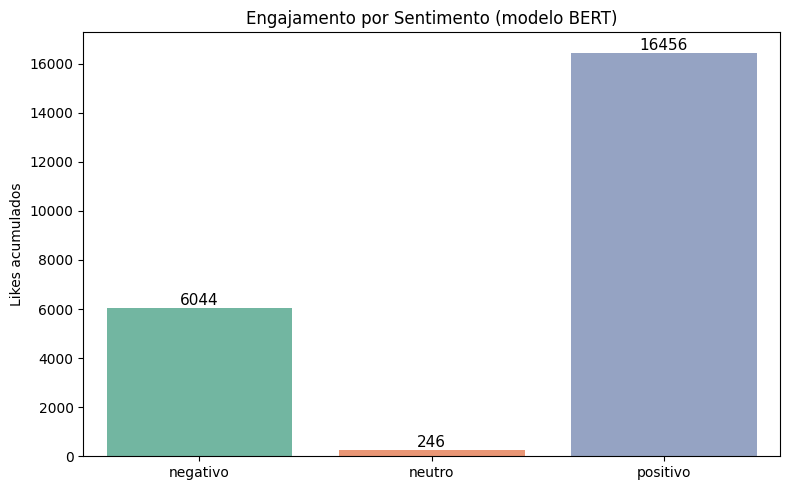

In [12]:
# (recarregue seu DataFrame se necessário)
resumo = df.groupby("Sentimento BERT")["Likes"].sum().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=resumo, x="Sentimento BERT", y="Likes", palette="Set2")
plt.title("Engajamento por Sentimento (modelo BERT)")
plt.xlabel("")
plt.ylabel("Likes acumulados")

# Adiciona os valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


<ipython-input-13-925c02eee088>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=contagem, x="Sentimento", y="Qtd de Comentários", palette="Blues")


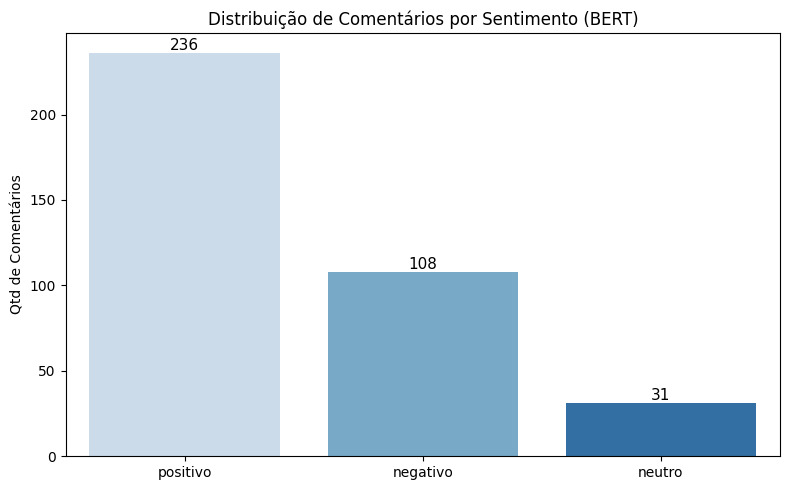

In [13]:
contagem = df["Sentimento BERT"].value_counts().reset_index()
contagem.columns = ["Sentimento", "Qtd de Comentários"]

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=contagem, x="Sentimento", y="Qtd de Comentários", palette="Blues")
plt.title("Distribuição de Comentários por Sentimento (BERT)")
plt.xlabel("")
plt.ylabel("Qtd de Comentários")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


In [14]:
# Ordenar os comentários por número de likes (do maior para o menor)
top_10 = df.sort_values(by="Likes", ascending=False).head(10).reset_index(drop=True)

# Exibir de forma legível
print("🔥 TOP 10 COMENTÁRIOS MAIS CURTIDOS\n" + "="*60)
for i, row in top_10.iterrows():
    print(f"\n#{i+1} | 👤 {row['Autor']} | 👍 {row['Likes']} | 🧠 Sentimento: {row['Sentimento BERT']}")
    print(f"🗨️  {row['Comentário']}")
    print("-" * 60)


🔥 TOP 10 COMENTÁRIOS MAIS CURTIDOS

#1 | 👤 @kiyu196 | 👍 5157 | 🧠 Sentimento: positivo
🗨️  E o povo brasileiro tem OBRIGAÇÃO de lotar as salas do cinema na sua estreia!
------------------------------------------------------------

#2 | 👤 @viajantedotempooo | 👍 5065 | 🧠 Sentimento: positivo
🗨️  É importante que o cinema brasileiro invista cada vez mais na história do nosso país. Temos tantos acontecimentos históricos importantes que merecem ser retratados no cinema!
------------------------------------------------------------

#3 | 👤 @LucasAlencar97 | 👍 3204 | 🧠 Sentimento: negativo
🗨️  O primeiro trailer brasileiro que vejo que não entrega o filme inteiro. Esse é diferenciado! Já estou ansioso...
------------------------------------------------------------

#4 | 👤 @paulovictor.c | 👍 2219 | 🧠 Sentimento: negativo
🗨️  O "Nós vamos sorrir" já deixa o choro preso na garganta
------------------------------------------------------------

#5 | 👤 @RCVieira88 | 👍 1145 | 🧠 Sentimento: positivo
🗨️